# Library - Reading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
pd.set_option('display.max_columns', None)
data = pd.read_csv('wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA - Cleansing

In [2]:
data.shape

(178, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


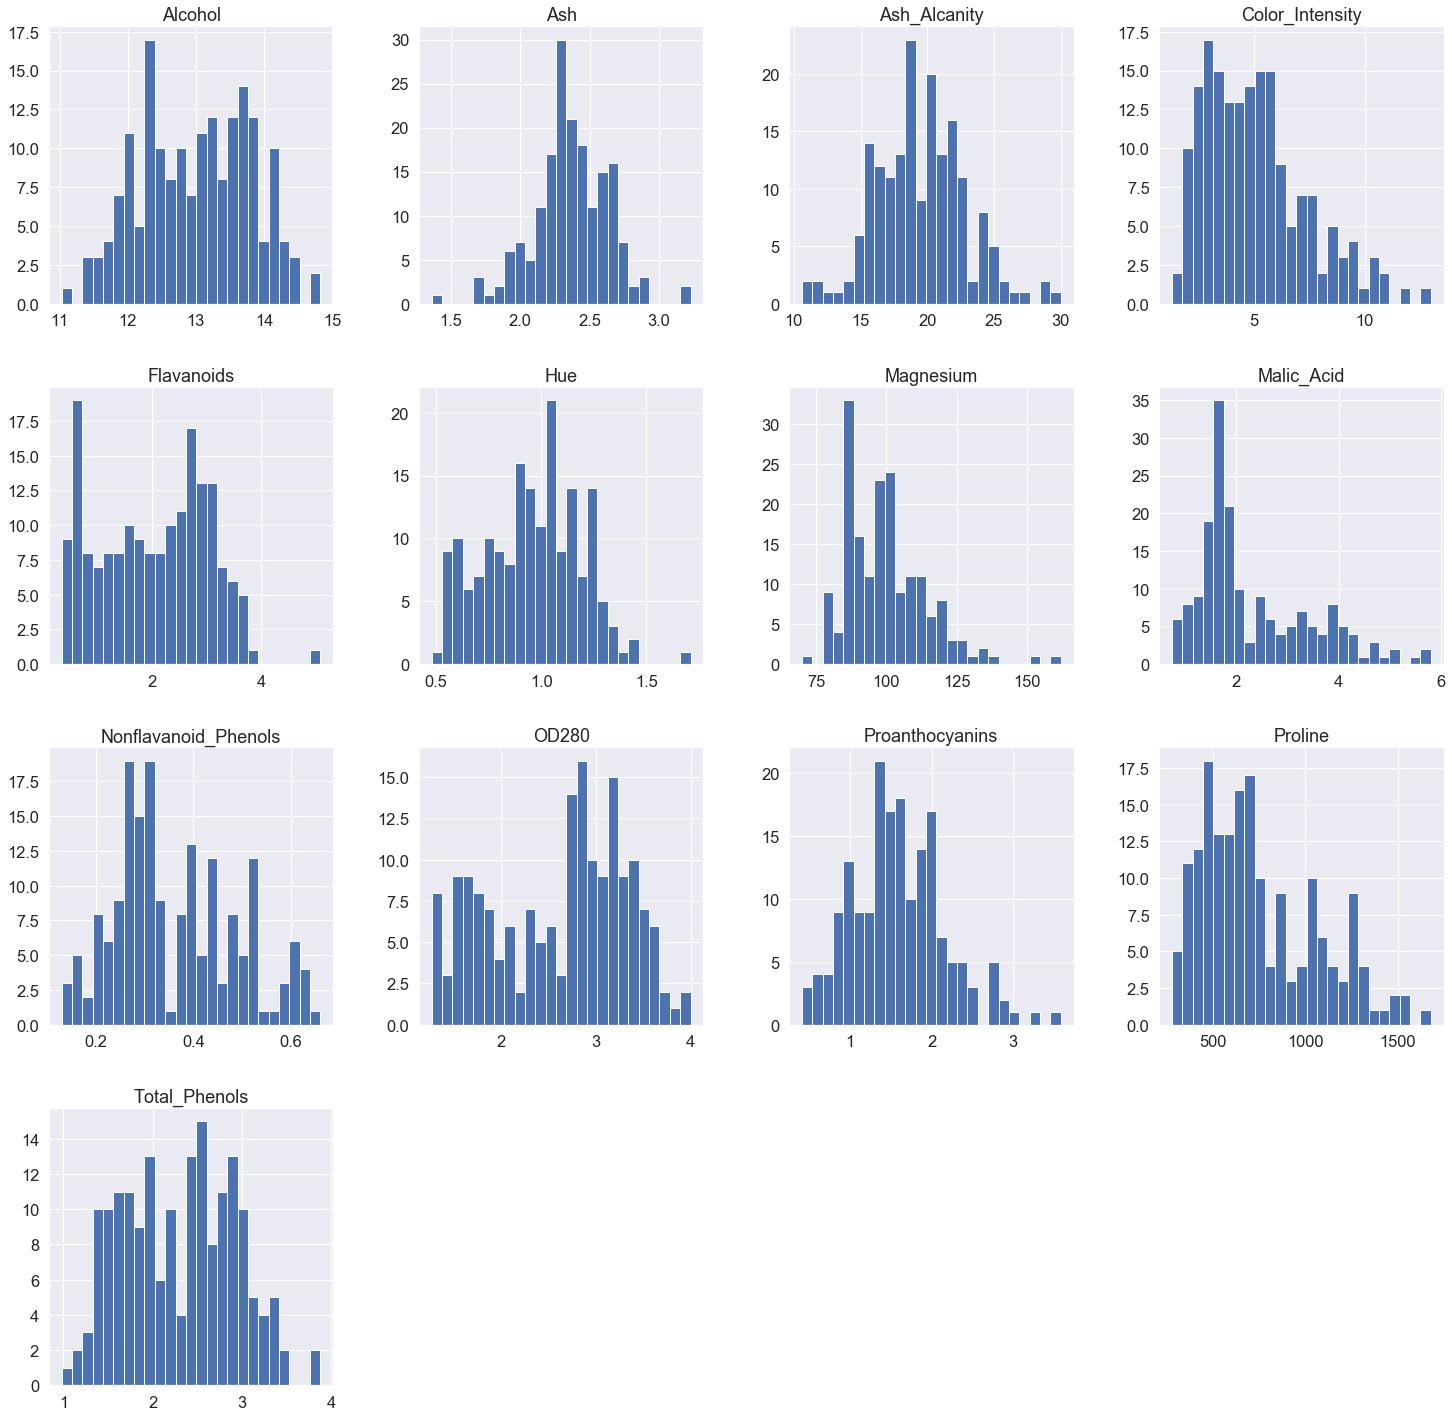

In [6]:
sns.set(font_scale= 1.5, rc={'figure.figsize':(25,25)})
ax = data.hist(bins=25)

In [7]:
skew = pd.DataFrame(data.skew(), columns = ['Skewness'])
skew

,Skewness
Alcohol,-0.051482
Malic_Acid,1.039651
Ash,-0.176699
Ash_Alcanity,0.213047
Magnesium,1.098191
Total_Phenols,0.086639
Flavanoids,0.025344
Nonflavanoid_Phenols,0.450151
Proanthocyanins,0.517137
Color_Intensity,0.868585


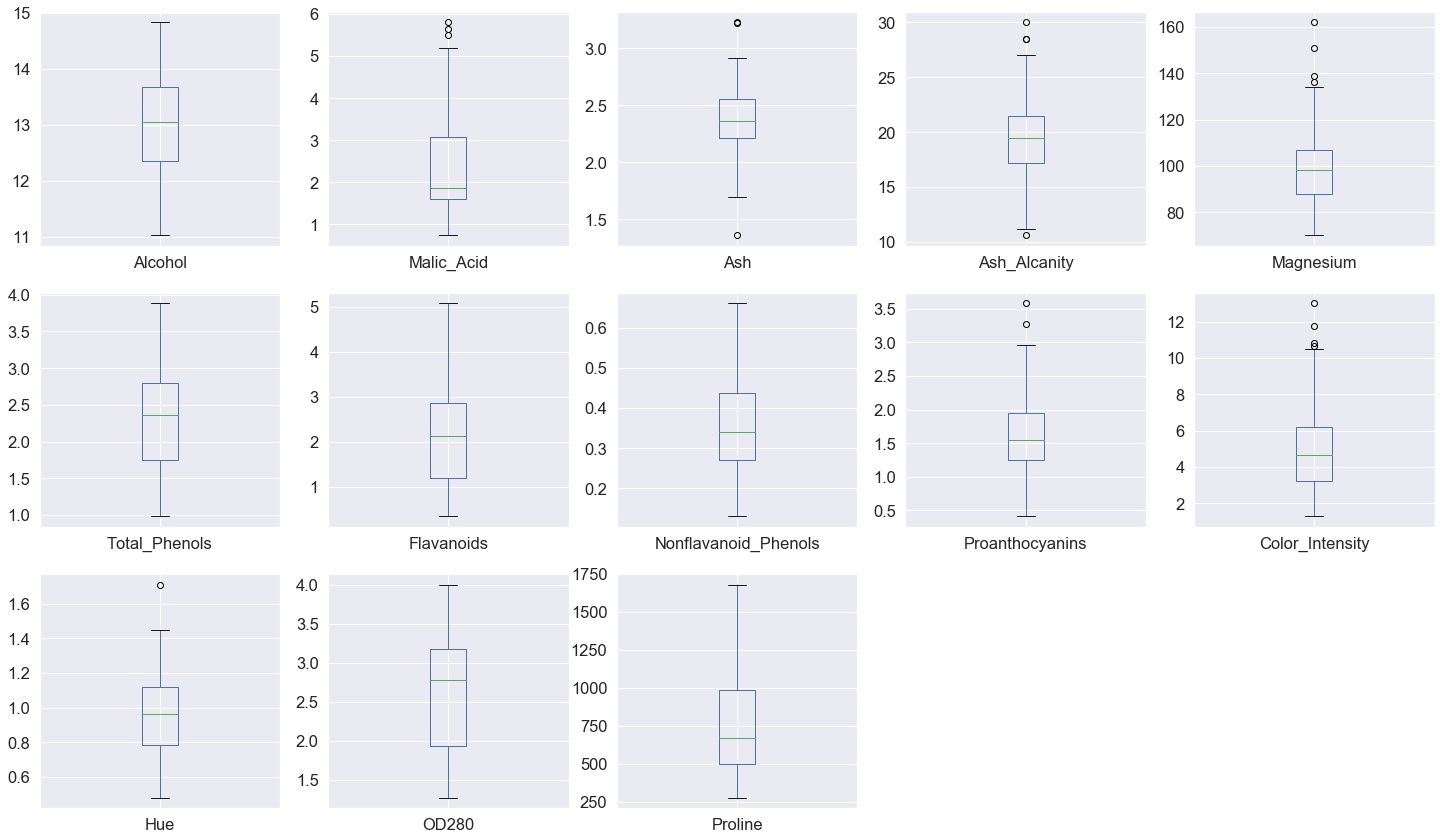

In [8]:
data.plot(kind = 'box', subplots= True, layout = (5,5))
plt.show()

In [9]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
print(iqr)

Alcohol                   1.3150
Malic_Acid                1.4800
Ash                       0.3475
Ash_Alcanity              4.3000
Magnesium                19.0000
Total_Phenols             1.0575
Flavanoids                1.6700
Nonflavanoid_Phenols      0.1675
Proanthocyanins           0.7000
Color_Intensity           2.9800
Hue                       0.3375
OD280                     1.2325
Proline                 484.5000
dtype: float64


In [10]:
condition_1 = (q1 - 1.5 * iqr)
condition_2 = (q3 + 1.5 * iqr)

data_cleaned = data[~((data < condition_1) | (data > condition_2)).any(axis=1)]
data_cleaned

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=data_cleaned.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02
mean,-4.551225e-16,-6.757879e-17,1.558450e-16,4.316768e-16,-2.063567e-16,5.861426e-16,-5.102888e-17,2.620402e-17,-1.551554e-17,-4.827057e-17,9.654113e-17,-3.323773e-16,2.675569e-16
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00
min,-2.049857e+00,-1.499357e+00,-2.758493e+00,-2.672685e+00,-2.314802e+00,-2.078638e+00,-1.733988e+00,-1.878728e+00,-2.170971e+00,-1.769080e+00,-1.928064e+00,-1.922370e+00,-1.490160e+00
25%,-8.428553e-01,-6.668235e-01,-5.543333e-01,-7.095058e-01,-8.545719e-01,-9.047796e-01,-8.383905e-01,-7.258140e-01,-5.876775e-01,-8.263062e-01,-7.779577e-01,-8.754661e-01,-7.963592e-01
50%,3.725025e-02,-4.275897e-01,-1.369043e-02,-7.729542e-02,-4.333325e-02,9.458657e-02,9.791652e-02,-1.493571e-01,-3.447866e-02,-1.014602e-01,9.612318e-02,2.138798e-01,-2.605217e-01
75%,8.419182e-01,6.920248e-01,6.933041e-01,5.881892e-01,6.056577e-01,8.084196e-01,8.815648e-01,5.918018e-01,6.140993e-01,5.617976e-01,7.401828e-01,7.797738e-01,8.545158e-01
max,2.250087e+00,2.759005e+00,2.315233e+00,2.584643e+00,2.877126e+00,2.521619e+00,1.919644e+00,2.485875e+00,2.693364e+00,2.608422e+00,2.258323e+00,1.939856e+00,2.852291e+00


In [12]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)
print ('Cumulative variance of 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance of 2 principal components: 59.34%


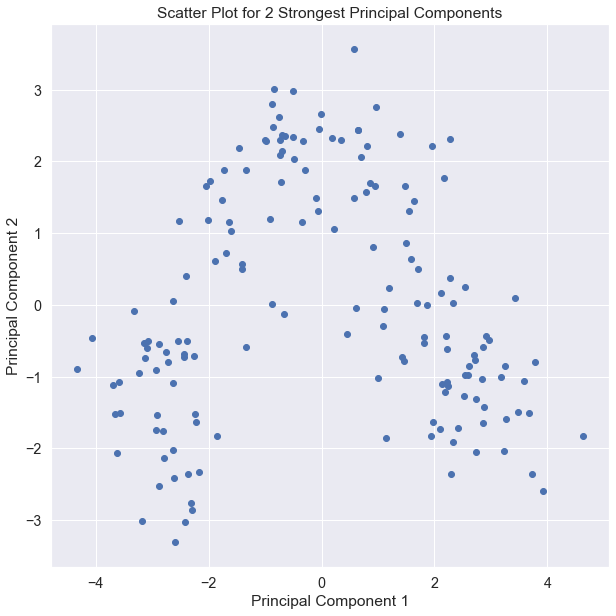

In [13]:
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.3)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot for 2 Strongest Principal Components')
plt.show()

# Elbow

In [14]:
import sklearn.cluster as cluster

inertia = []
for i in (range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_2_result)
    inertia.append(kmeans.inertia_)

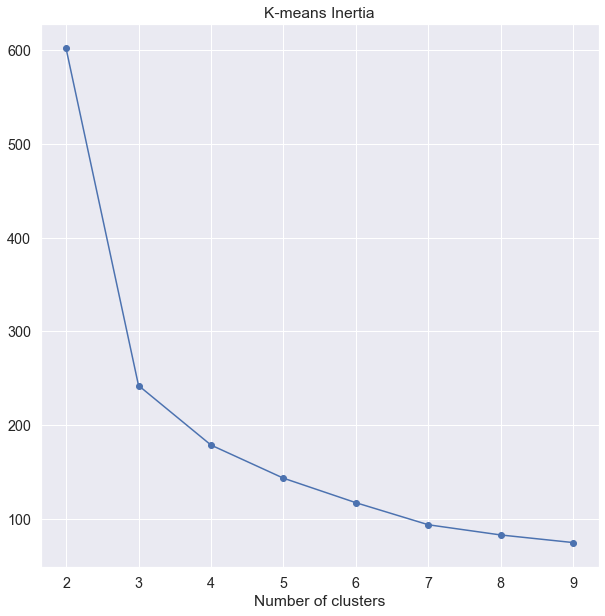

In [15]:
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.3)

plt.plot(range(2,len(inertia)+2), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia')
plt.grid(True)

# Clustering - Visualizing

In [16]:
kmeans = cluster.KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

2    58
0    58
1    45
dtype: int64

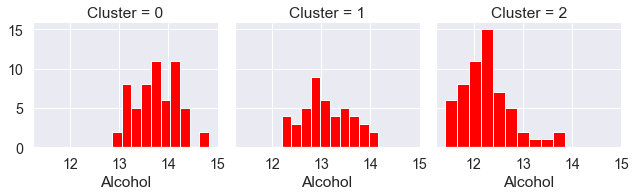

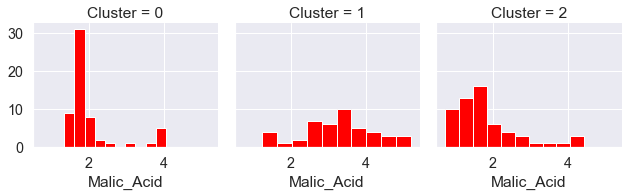

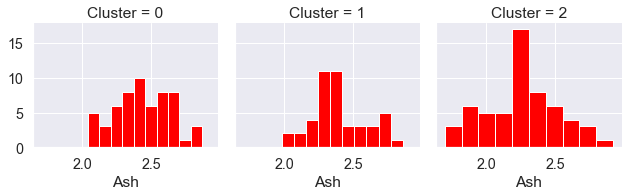

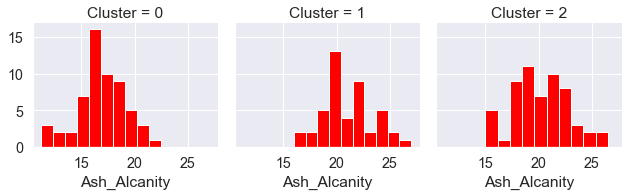

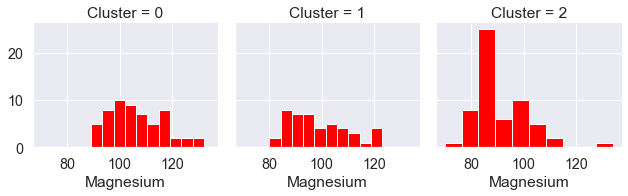

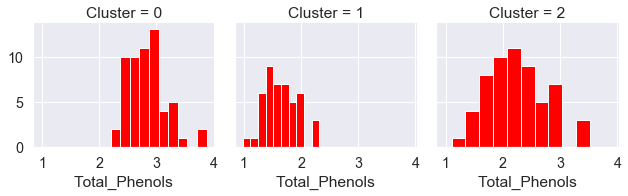

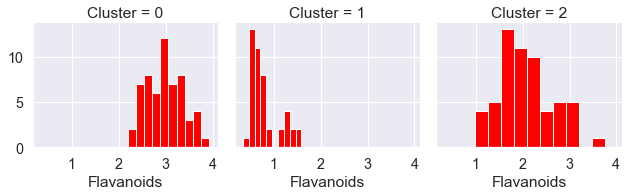

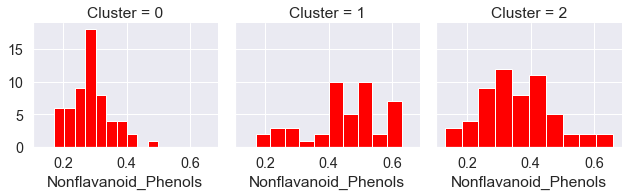

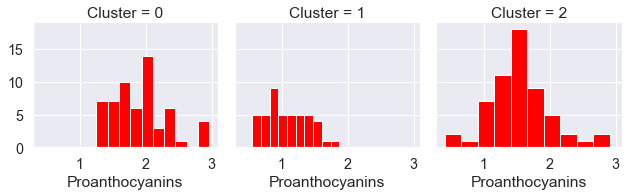

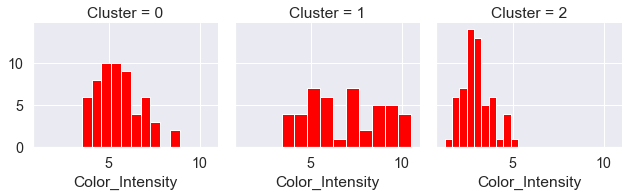

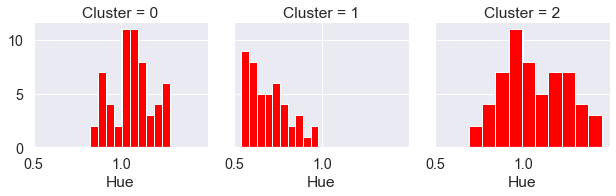

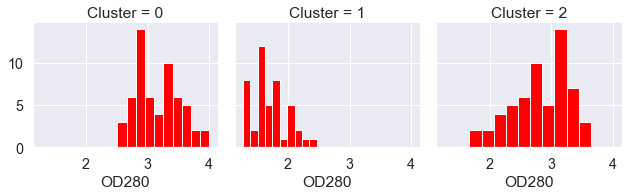

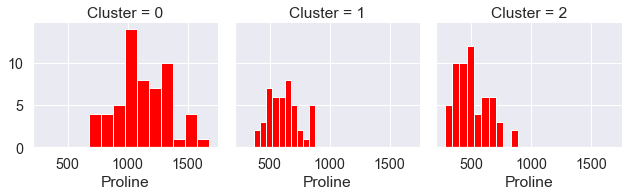

In [17]:
data2=data_cleaned.copy()
data2['Cluster']=kmeans_labels

aux=data2.columns.tolist()

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data2, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

In [18]:
centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids), columns=data.columns)
centroids_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.756724,2.010000,2.442414,16.900000,106.034483,2.843793,2.987586,0.286897,1.898966,5.561897,1.060862,3.157069,1120.637931
1,13.100889,3.284222,2.395333,21.006667,98.466667,1.640667,0.796889,0.448444,1.079333,6.889778,0.696889,1.696222,619.155556
2,12.277069,1.845345,2.259310,20.187931,91.086207,2.241034,2.067414,0.359310,1.560862,3.011207,1.060793,2.824138,506.172414


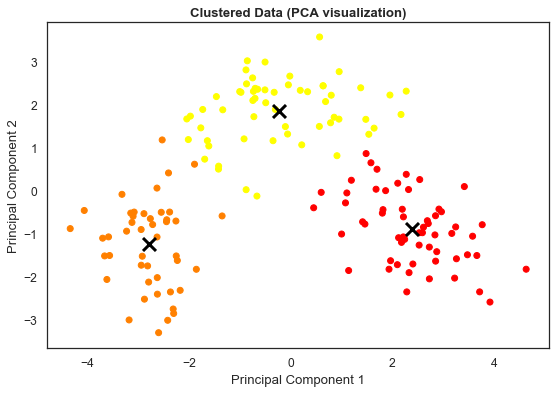

In [19]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

## PCA 3 Component

In [20]:
from sklearn.decomposition import PCA
pca_3 = PCA(3)
pca_3_result = pca_3.fit_transform(data_cluster)
print ('Cumulative variance of 3 principal components: {:.2%}'.format(np.sum(pca_3.explained_variance_ratio_)))

Cumulative variance of 3 principal components: 68.89%


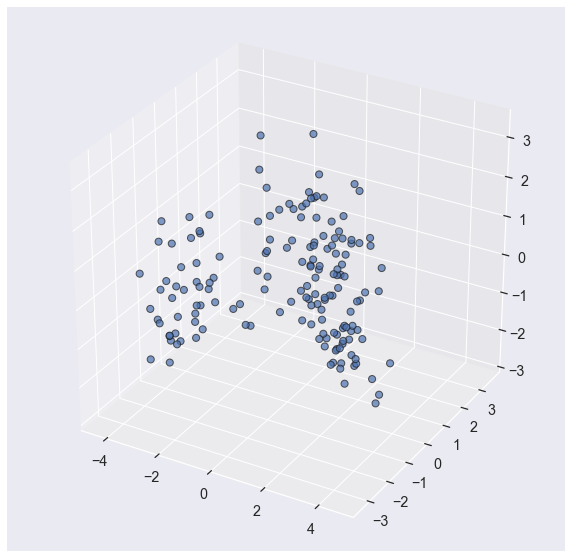

In [21]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.3)

x=pca_3_result[:, 0]
y=pca_3_result[:, 1]
z=pca_3_result[:, 2]


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50)

plt.show()

# Elbow

In [23]:
import sklearn.cluster as cluster
inertia = []
for i in (range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_3_result)
    inertia.append(kmeans.inertia_)

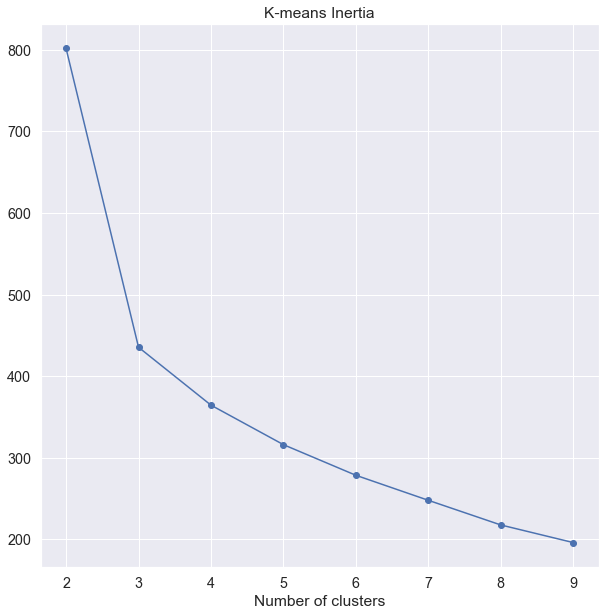

In [24]:
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.3)

plt.plot(range(2,len(inertia)+2), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia')
plt.grid(True)

# Clustering - Visualizing

In [28]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_3.transform(centroids)

pd.Series(kmeans_labels).value_counts()

2    58
0    58
1    45
dtype: int64

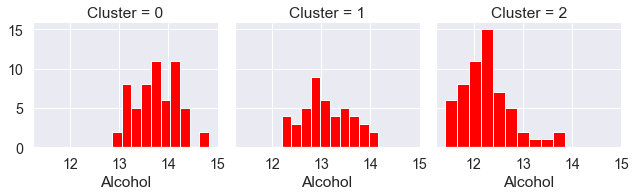

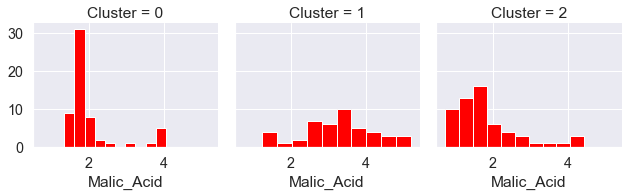

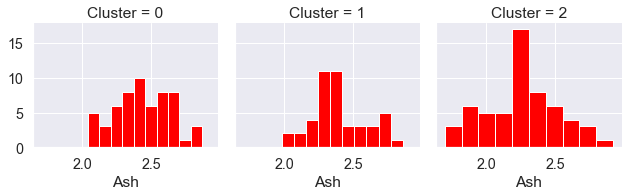

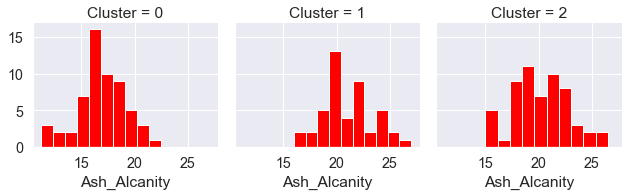

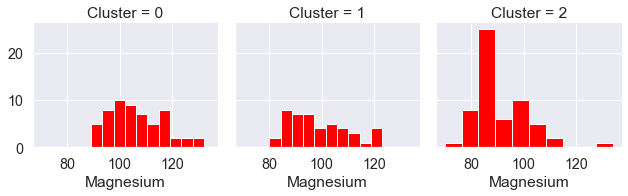

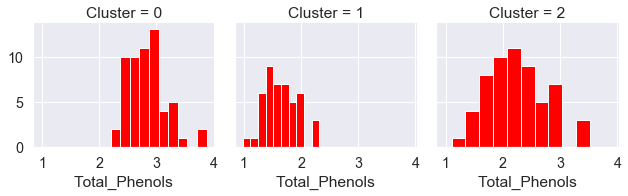

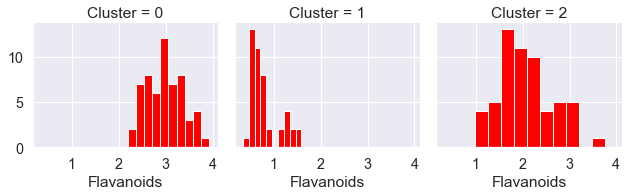

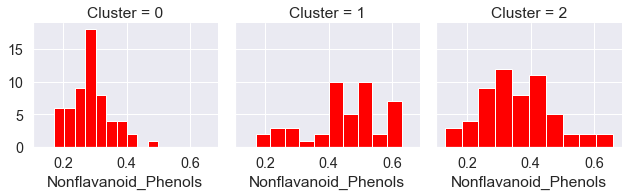

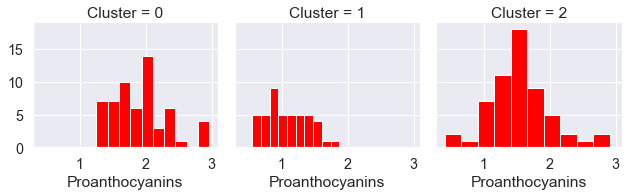

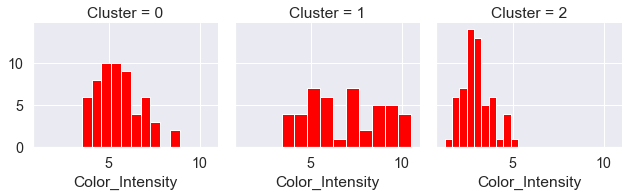

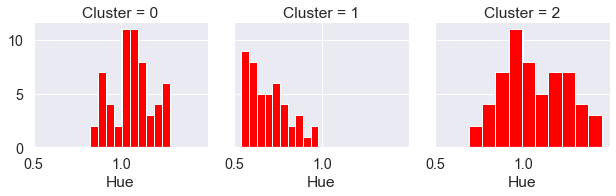

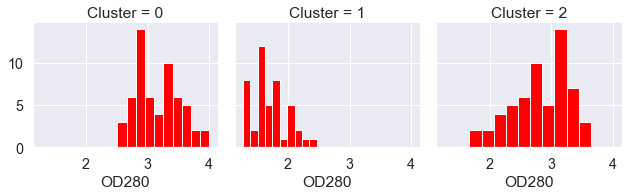

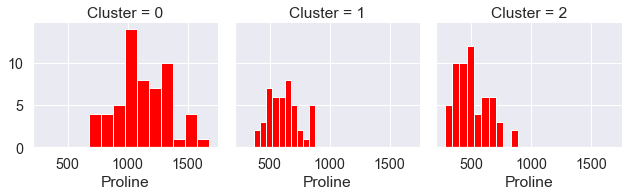

In [29]:
data3=data_cleaned.copy()
data3['Cluster']=kmeans_labels

aux=data3.columns.tolist()

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data3, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

In [30]:
centroids_data=pd.DataFrame(data=std_scaler.inverse_transform(centroids), columns=data.columns)
centroids_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,13.756724,2.010000,2.442414,16.900000,106.034483,2.843793,2.987586,0.286897,1.898966,5.561897,1.060862,3.157069,1120.637931
1,13.100889,3.284222,2.395333,21.006667,98.466667,1.640667,0.796889,0.448444,1.079333,6.889778,0.696889,1.696222,619.155556
2,12.277069,1.845345,2.259310,20.187931,91.086207,2.241034,2.067414,0.359310,1.560862,3.011207,1.060793,2.824138,506.172414


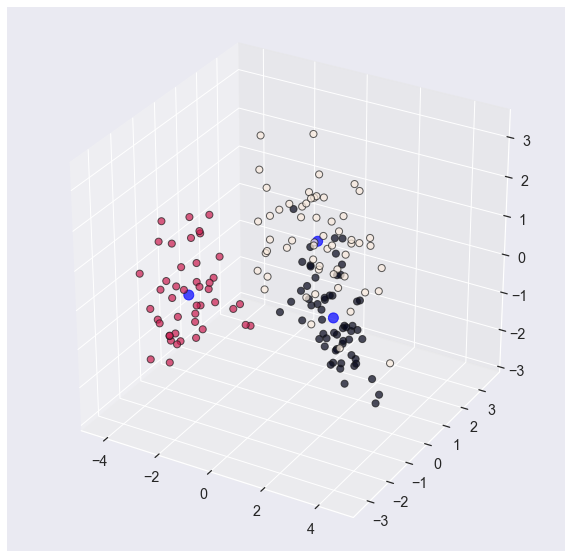

In [38]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.3)

x=pca_3_result[:, 0]
y=pca_3_result[:, 1]
z=pca_3_result[:, 2]


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c = kmeans_labels)
ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2],
           linewidths=1, alpha=.7, s = 100, c='blue')

plt.show()